Mark Hurley, Grace Michael

hurley.mar@northeastern.edu, michael.g@northeastern.edu

Most Popular Professional U.S. Sports Team

Step 1: Read data from csv file and put into dataframe

In [1027]:
import pandas as pd
df = pd.read_csv('sports.csv', names=['Team Name', 'Play-off Appearances', 'Twitter Followers', 'Jersey Sale Rankings', 'League'], header=None)   # Read CSV file into dataframes table
df = df.drop([0])
df

,Team Name,Play-off Appearances,Twitter Followers,Jersey Sale Rankings,League
1,Atlanta Hawks,47,1267242,0,NBA
2,Chicago Bulls,34,4190783,21,NBA
3,Detroit Pistons,43,956417,0,NBA
4,Los Angeles Clippers,15,1685503,23,NBA
5,Milwaukee Bucks,32,1299325,3,NBA
...,...,...,...,...,...
145,Toronto Maple Leafs,69,1916337,12,NHL
146,Vancouver Canucks,28,1060562,0,NHL
147,Vegas Golden Knights,3,479559,"2, 21",NHL
148,Washington Capitals,30,777411,"1, 8, 10",NHL


Step 2: Analyze jersey sale rankings and give each team a score

In [1028]:
jsr = df['Jersey Sale Rankings'].tolist()

list1 = []

for x in jsr:   # loop through each team's 'Jersey Sale Ranking' section
      
    x = x.split(',')   #split data by comma 
    sum1 = 0
    for k in x:
    
        if k != ' ':
            
            k = int(k)
            if k > 0:  #only scores > 0 are considered
                sum1 += abs(26 - k)
                
            else:
                sum1 += 0
            
    list1.append(sum1)   #Add score to list (each team's score)

Step 3: Add new column to dataframe containing each team's Jersey Sale Score

In [1029]:
df['Jersey Sale Rankings Score'] = list1
df

,Team Name,Play-off Appearances,Twitter Followers,Jersey Sale Rankings,League,Jersey Sale Rankings Score
1,Atlanta Hawks,47,1267242,0,NBA,0
2,Chicago Bulls,34,4190783,21,NBA,5
3,Detroit Pistons,43,956417,0,NBA,0
4,Los Angeles Clippers,15,1685503,23,NBA,3
5,Milwaukee Bucks,32,1299325,3,NBA,23
...,...,...,...,...,...,...
145,Toronto Maple Leafs,69,1916337,12,NHL,14
146,Vancouver Canucks,28,1060562,0,NHL,0
147,Vegas Golden Knights,3,479559,"2, 21",NHL,29
148,Washington Capitals,30,777411,"1, 8, 10",NHL,59


Step 4: This function outputs a dataframe of top 5 teams given category (column) and league

In [1030]:
def stats(df, column, league):
    
    grouped = df.groupby(df.League)   # Separate data by league
    df[column] = df[column].astype(int)
    
    group = grouped.get_group(league)
    df1 = pd.DataFrame(group.nlargest(5, column))  # Dataframe of top 5 teams  
    df1['Score'] = [5, 4, 3, 2, 1]   # Assign score to top 5 teams
    
    return df1

Step 5: Create a score system for all teams based on their rankings per category and league

In [1031]:
def score(lst):
    mydict = {}
    
    for x in lst:
        
        for team in x['Team Name']:
    
            score= x.loc[x['Team Name'] == team, 'Score'].iloc[0]   #Give individual score to team if appears in a top 5 ranking
            if team in mydict:   # Find cumulative score for each team
                
                mydict[team] += score
            else:
                
                mydict[team] = score
                
                
                
    return mydict               

Step 6: Plot results from previous functions

In [1032]:
%matplotlib inline
import matplotlib.pyplot as plt
import operator as opr

def visuals(data, top):
    
    
    sorted_d = dict(sorted(data.items(), key=opr.itemgetter(1), reverse=True))   # Sort dictionary by team's score
    
    
    xpos = sorted_d.keys()
    ypos = sorted_d.values()
    xpos = list(xpos)[:top]
    ypos = list(ypos)[:top]

        
    plt.bar(xpos, ypos)
    plt.xlabel("Team Name")
    plt.ylabel("Total Score")
    plt.title("Total Score per Team")
    plt.xticks(rotation=90)
    plt.show()  

Our winner is the Los Angeles Lakers with a score of 15 points :)


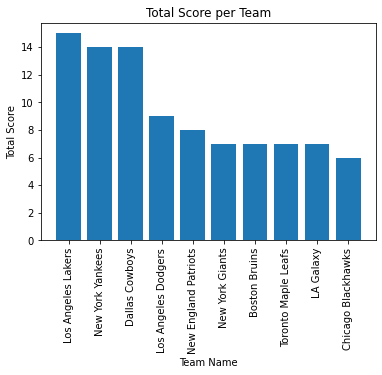

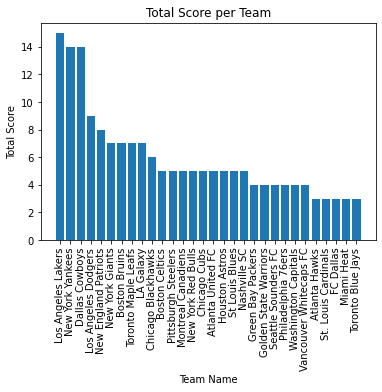

In [1033]:
def main():
    
    NBA_p = stats(df, 'Play-off Appearances', 'NBA')
    MLB_p = stats(df, 'Play-off Appearances', 'MLB')
    NFL_p = stats(df, 'Play-off Appearances', 'NFL')
    NHL_p = stats(df, 'Play-off Appearances', 'NHL')
    MLS_p = stats(df, 'Play-off Appearances', 'MLS')
    
    NBA_t = stats(df, 'Twitter Followers', 'NBA')
    MLB_t = stats(df, 'Twitter Followers', 'MLB')
    NFL_t = stats(df, 'Twitter Followers', 'NFL')
    NHL_t = stats(df, 'Twitter Followers', 'NHL')
    MLS_t = stats(df, 'Twitter Followers', 'MLS')
    
    NBA_j = stats(df, 'Jersey Sale Rankings Score', 'NBA')
    MLB_j = stats(df, 'Jersey Sale Rankings Score', 'MLB')
    NFL_j = stats(df, 'Jersey Sale Rankings Score', 'NFL')
    NHL_j = stats(df, 'Jersey Sale Rankings Score', 'NHL')
    MLS_j = stats(df, 'Jersey Sale Rankings Score', 'MLS')
    
    lst = [NBA_p, MLB_p, NFL_p, NHL_p, MLS_p, NBA_t, MLB_t, NFL_t, NHL_t, MLS_t, NBA_j, MLB_j, NFL_j, NHL_j, MLS_j]
    
    
    
    data = score(lst)
    
    winner = ''
    winning_score = 0 
    for team, team_score in data.items():
        
        if team_score > winning_score:
            
            winning_score = team_score
            winner = team
            
    print("Our winner is the", winner, "with a score of", winning_score, "points", ":)")
    
    visuals(data, 10)
    visuals(data, 30)
    
main()